In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [187]:
data=pd.read_csv('thermodynamics.csv')

In [231]:
data

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [233]:
data.head()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420


In [235]:
data.tail()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
194,195,97.5,9192.93,297.812,1134.07,821.665,-2642.75,-1821.08,1.00555
195,196,98.0,9337.59,296.965,-1927.79,819.329,-2596.11,-1776.78,0.98997
196,197,98.5,9119.26,309.630,-1103.29,854.271,-2628.38,-1774.11,1.01367
197,198,99.0,9022.08,295.689,1359.53,815.807,-2629.19,-1813.38,1.02459
198,199,99.5,8865.98,300.846,2497.79,830.037,-2690.37,-1860.33,1.04263


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Step         199 non-null    int64  
 1   Time         199 non-null    float64
 2   Volume       199 non-null    float64
 3   Temperature  199 non-null    float64
 4   Pressure     199 non-null    float64
 5   Kinetic      199 non-null    float64
 6   Potential    199 non-null    float64
 7   Energy       199 non-null    float64
 8   Density      199 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1 KB


In [239]:
data.describe()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,50.000000,9007.441307,298.888402,102.621241,824.634824,-2648.653166,-1824.018593,1.026478
std,57.590508,28.795254,133.275619,7.676824,1825.960539,21.180391,27.242203,32.394689,0.015152
min,1.000000,0.500000,8702.080000,275.620000,-4657.720000,760.436000,-2720.630000,-1912.660000,0.978717
25%,50.500000,25.250000,8920.410000,293.669500,-1146.185000,810.237000,-2670.345000,-1846.340000,1.014575
50%,100.000000,50.000000,9000.960000,299.139000,170.431000,825.327000,-2648.770000,-1824.730000,1.026990
75%,149.500000,74.750000,9111.105000,304.264000,1650.755000,839.465500,-2629.215000,-1800.455000,1.036270
max,199.000000,99.500000,9444.950000,322.245000,4959.470000,889.075000,-2589.970000,-1753.220000,1.062270


In [191]:
x=data[['Volume', 'Temperature', 'Pressure', 'Kinetic', 'Potential', 'Energy']]
y=data['Density']

In [193]:
x

,Volume,Temperature,Pressure,Kinetic,Potential,Energy
0,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56
1,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74
2,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62
3,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57
4,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97
...,...,...,...,...,...,...
194,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08
195,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78
196,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11
197,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38


In [195]:
y

0      1.005360
1      0.993652
2      1.014290
3      1.004950
4      1.012420
         ...   
194    1.005550
195    0.989970
196    1.013670
197    1.024590
198    1.042630
Name: Density, Length: 199, dtype: float64

In [197]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [199]:
scaler=StandardScaler()

In [201]:
scaler

StandardScaler()

In [203]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [205]:
x_train_scaled

array([[ 0.26004602, -1.55029652,  0.81189743, -1.550346  ,  0.3615644 ,
        -0.7214667 ],
       [ 1.090126  ,  0.42820735,  0.43375315,  0.42820468,  1.38532264,
         1.46134793],
       [-0.1174796 , -0.7057664 ,  0.34631662, -0.70580526,  1.19074871,
         0.5435736 ],
       [ 0.24858329,  0.68115648, -0.11753611,  0.68120267, -1.00831094,
        -0.40504762],
       [-0.95522621,  0.1621678 , -1.72674155,  0.16217099, -1.47940437,
        -1.14950698],
       [ 2.00855829, -1.29721515, -2.3467934 , -1.29715631,  1.91291735,
         0.76490795],
       [ 0.19781979, -1.46897727, -0.57669229, -1.46901666,  1.63228187,
         0.41255384],
       [-1.84976541,  0.06815482, -2.28510861,  0.06818935, -1.28707552,
        -1.04838008],
       [ 0.20496539, -0.18598435,  1.08606971, -0.1860547 , -0.5585458 ,
        -0.59839717],
       [-0.08591988, -0.7133033 ,  0.24486887, -0.71328161,  0.23060118,
        -0.27720795],
       [-1.46650843,  0.02174335, -1.24558045,  0.

In [207]:
x_test_scaled

array([[ 1.41265003,  0.76799046, -0.20948714,  0.76800603,  0.96542332,
         1.26010846],
       [-1.15923819,  0.09583927,  0.48518807,  0.09581781,  0.59718025,
         0.5434791 ],
       [ 0.04074025, -0.72884093,  0.87779497, -0.72887724,  0.26156191,
        -0.2412399 ],
       [-0.46175564, -2.85663317,  0.87953599, -2.8566891 , -0.9132758 ,
        -2.51689686],
       [-1.36099194,  2.96306023,  1.52014581,  2.96304576, -0.82338423,
         1.17541846],
       [-0.77131073, -0.05594083, -0.21572484, -0.05591993, -0.81262501,
        -0.69338885],
       [-0.42099571, -0.15055375,  1.52779951, -0.15056374,  1.24793969,
         0.91797211],
       [-1.08723948, -0.43501662, -0.39042865, -0.43503806,  0.19804779,
        -0.10984378],
       [ 0.59792368, -0.76091945, -0.36648965, -0.76095299,  0.57010865,
        -0.01108567],
       [ 0.8499585 ,  1.28461696,  0.56416133,  1.28465629,  0.55206093,
         1.24660308],
       [ 0.84964375, -0.51190522, -2.03298922, -0.

In [209]:
model=LinearRegression()

In [211]:
model

LinearRegression()

In [213]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [215]:
y_pred=model.predict(x_test_scaled)

In [217]:
y_pred

array([1.01643221, 1.04860029, 1.02236989, 1.00767248, 1.06216547,
       1.03241997, 1.03982579, 1.04119072, 1.01568967, 1.02583302,
       1.00308432, 0.99424924, 1.00337044, 1.01873616, 1.02781034,
       1.05720733, 1.00628647, 1.00931548, 1.03343431, 1.01969007,
       1.01288078, 1.03367443, 1.05212702, 1.02044274, 1.01604236,
       1.02820926, 1.02951351, 1.02347115, 1.01757164, 1.05487837,
       1.03177906, 1.06198104, 0.99788614, 1.02121488, 1.02545465,
       1.04904759, 1.0008667 , 1.03240031, 1.03274535, 1.02648871])

In [219]:
mse=mean_squared_error(y_test, y_pred)

In [221]:
mse

np.float64(8.498053573017076e-05)

In [223]:
r2=r2_score(y_test, y_pred)

In [225]:
r2

0.598081245172914

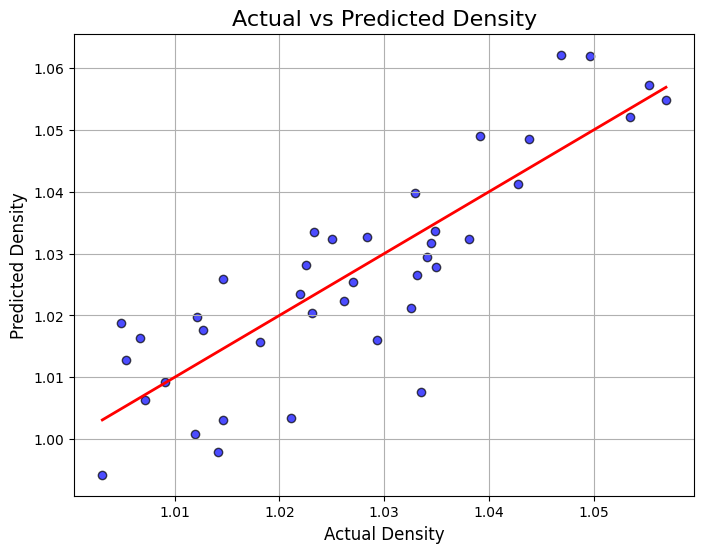

In [227]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Density', fontsize=16)
plt.xlabel('Actual Density', fontsize=12)
plt.ylabel('Predicted Density', fontsize=12)
plt.grid(True)
plt.show()

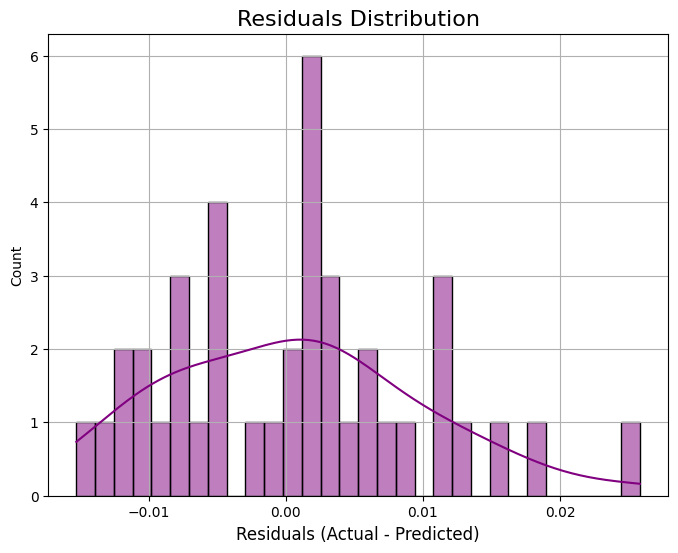

In [229]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True)
plt.show()